In [2]:
#Basic imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from sklearn import metrics #used for labeling
from kmodes.kprototypes import KPrototypes

from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 

#plotly imports
import plotly as py
import chart_studio.plotly as cs
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
#df is our original DataFrame
X = pd.read_csv('scaled_dummy_reduced_df.csv', index_col=0)
X.head()

,number_of_trips_taken,qtemphigh,qtemplow,qprecipitation,qday_Friday,qday_Monday,qday_Saturday,qday_Sunday,qday_Thursday,qday_Tuesday,qday_Wednesday,qday1typical_Not at all typical,qday1typical_Not very typical,qday1typical_Somewhat typical,qday1typical_Very typical,qborough_home_Brooklyn,qborough_home_Manhattan,qborough_home_Queens,qborough_home_Staten Island,qborough_home_The Bronx,qsurveyzone_home_Inner Brooklyn,qsurveyzone_home_Inner Queens,qsurveyzone_home_Manhattan Core,qsurveyzone_home_Middle Queens,qsurveyzone_home_Northern Bronx,qsurveyzone_home_Northern Manhattan,qsurveyzone_home_Outer Brooklyn,qsurveyzone_home_Outer Queens,qsurveyzone_home_Southern Bronx,qsurveyzone_home_Staten Island,qtripdaytime_AM,qtripdaytime_NOON,qtripdaytime_PM,qborough_start_Brooklyn,qborough_start_Inner Brooklyn,qborough_start_Inner Queens,qborough_start_Manhattan,qborough_start_Manhattan Core,qborough_start_Middle Queens,qborough_start_Northern Bronx,qborough_start_Northern Manhattan,qborough_start_Outer Brooklyn,qborough_start_Outer Queens,qborough_start_Outside of NYC,qborough_start_Queens,qborough_start_Southern Bronx,qborough_start_Staten Island,qborough_start_The Bronx,surveyzone_start_Inner Brooklyn,surveyzone_start_Inner Queens,surveyzone_start_Manhattan Core,surveyzone_start_Middle Queens,surveyzone_start_NOT CODED,surveyzone_start_Northern Bronx,surveyzone_start_Northern Manhattan,surveyzone_start_Outer Brooklyn,surveyzone_start_Outer Queens,surveyzone_start_Southern Bronx,surveyzone_start_Staten Island,qday1tripend_Child's daycare facility or school,qday1tripend_Doctor's office or hospital,"qday1tripend_Entertainment event (i.e. sporting event, play, etc.)",qday1tripend_Friend or family member's home,"qday1tripend_Grocery store or market (including deli, bodega, etc.)",qday1tripend_Home,qday1tripend_Other,qday1tripend_Outside of New York City,qday1tripend_Park/Recreational area/Gym,qday1tripend_Restaurant or bar,"qday1tripend_Retail store (e.g. clothing, electronic, hardware, etc.)",qday1tripend_School,qday1tripend_Work,qborough_end_Brooklyn,qborough_end_Manhattan,qborough_end_Outside of NYC,qborough_end_Queens,qborough_end_Staten Island,qborough_end_The Bronx,surveyzone_end_Inner Brooklyn,surveyzone_end_Inner Queens,surveyzone_end_Manhattan Core,surveyzone_end_Middle Queens,surveyzone_end_Northern Bronx,surveyzone_end_Northern Manhattan,surveyzone_end_Outer Brooklyn,surveyzone_end_Outer Queens,surveyzone_end_Southern Bronx,surveyzone_end_Staten Island,qday1tripendcode_Airport,qday1tripendcode_Bus stop,qday1tripendcode_Child's daycare facility or school,qday1tripendcode_Commuter rail station,qday1tripendcode_Doctor's office or hospital,"qday1tripendcode_Entertainment event (i.e. sporting event, play, etc.)",qday1tripendcode_Friend or family member's home,qday1tripendcode_Grand Central Station,"qday1tripendcode_Grocery store or market (including deli, bodega, etc.)",qday1tripendcode_Home,qday1tripendcode_Other,qday1tripendcode_PATH Station,qday1tripendcode_Park and ride/parking lot,qday1tripendcode_Park/Recreational area/Gym,qday1tripendcode_Penn Station,qday1tripendcode_Restaurant or bar,"qday1tripendcode_Retail store (e.g. clothing, electronic, hardware, etc.)",qday1tripendcode_Road/tunnel/bridge,qday1tripendcode_School,qday1tripendcode_Work,qday1triplength_cat_0 to 5,qday1triplength_cat_11 to 15,qday1triplength_cat_16 to 20,qday1triplength_cat_180+,qday1triplength_cat_21 to 25,qday1triplength_cat_26 to 30,qday1triplength_cat_31 to 35,qday1triplength_cat_36 to 40,qday1triplength_cat_41 to 45,qday1triplength_cat_46 to 50,qday1triplength_cat_51 to 55,qday1triplength_cat_56 to 60,qday1triplength_cat_6 to 10,qday1triplength_cat_61 to 180,qdisability1_No,qdisability1_Yes,qdisability2_No,qdisability2_Yes,qdisability3_No,qdisability3_Yes,qdisability4_No,qdisability4_Yes,qdisability5_No,qdisability5_Yes,qdisability6_No,qdisability6_Yes,qdisability7_No,qdisability7_Yes,qdisability8_No,qdisability8_Yes,qdisability9_No,qdisability9_Yes,qage

In [4]:
numer = X[["number_of_trips_taken", "qtemphigh", "qtemplow", "qprecipitation"]]

In [5]:
categ = X[["qday_Friday","qday_Monday","qday_Saturday","qday_Sunday","qday_Thursday","qday_Tuesday",
           "qday_Wednesday","qday1typical_Not at all typical",
           "qday1typical_Not very typical","qday1typical_Somewhat typical",
           "qday1typical_Very typical","qborough_home_Brooklyn","qborough_home_Manhattan",
           "qborough_home_Queens","qborough_home_Staten Island","qborough_home_The Bronx",
           "qsurveyzone_home_Inner Brooklyn","qsurveyzone_home_Inner Queens",
           "qsurveyzone_home_Manhattan Core","qsurveyzone_home_Middle Queens",
           "qsurveyzone_home_Northern Bronx","qsurveyzone_home_Northern Manhattan",
           "qsurveyzone_home_Outer Brooklyn","qsurveyzone_home_Outer Queens",
           "qsurveyzone_home_Southern Bronx", "qsurveyzone_home_Staten Island",
           "qtripdaytime_AM","qtripdaytime_NOON","qtripdaytime_PM","qborough_start_Brooklyn",
           "qborough_start_Inner Brooklyn",
           "qborough_start_Inner Queens","qborough_start_Manhattan","qborough_start_Manhattan Core",
           "qborough_start_Middle Queens","qborough_start_Northern Bronx","qborough_start_Northern Manhattan",
           "qborough_start_Outer Brooklyn","qborough_start_Outer Queens","qborough_start_Outside of NYC","qborough_start_Queens",
           "qborough_start_Southern Bronx","qborough_start_Staten Island",
           "qborough_start_The Bronx","surveyzone_start_Inner Brooklyn","surveyzone_start_Inner Queens",
           "surveyzone_start_Manhattan Core","surveyzone_start_Middle Queens","surveyzone_start_NOT CODED","surveyzone_start_Northern Bronx",
           "surveyzone_start_Northern Manhattan","surveyzone_start_Outer Brooklyn","surveyzone_start_Outer Queens",
           "surveyzone_start_Southern Bronx","surveyzone_start_Staten Island","qday1tripend_Child's daycare facility or school",
           "qday1tripend_Doctor's office or hospital","qday1tripend_Entertainment event (i.e. sporting event, play, etc.)",
           "qday1tripend_Friend or family member's home","qday1tripend_Grocery store or market (including deli, bodega, etc.)","qday1tripend_Home",
           "qday1tripend_Other","qday1tripend_Outside of New York City","qday1tripend_Park/Recreational area/Gym","qday1tripend_Restaurant or bar",
           "qday1tripend_Retail store (e.g. clothing, electronic, hardware, etc.)",
           "qday1tripend_School","qday1tripend_Work","qborough_end_Brooklyn",
           "qborough_end_Manhattan","qborough_end_Outside of NYC","qborough_end_Queens",
           "qborough_end_Staten Island","qborough_end_The Bronx",
           "surveyzone_end_Inner Brooklyn","surveyzone_end_Inner Queens",
           "surveyzone_end_Manhattan Core","surveyzone_end_Middle Queens",
           "surveyzone_end_Northern Bronx","surveyzone_end_Northern Manhattan",
           "surveyzone_end_Outer Brooklyn","surveyzone_end_Outer Queens",
           "surveyzone_end_Southern Bronx","surveyzone_end_Staten Island","qday1tripendcode_Airport",
           "qday1tripendcode_Bus stop","qday1tripendcode_Child's daycare facility or school",
           "qday1tripendcode_Commuter rail station","qday1tripendcode_Doctor's office or hospital",
           "qday1tripendcode_Entertainment event (i.e. sporting event, play, etc.)",
           "qday1tripendcode_Friend or family member's home","qday1tripendcode_Grand Central Station",
           "qday1tripendcode_Grocery store or market (including deli, bodega, etc.)",
           "qday1tripendcode_Home","qday1tripendcode_Other","qday1tripendcode_PATH Station","qday1tripendcode_Park and ride/parking lot",
           "qday1tripendcode_Park/Recreational area/Gym","qday1tripendcode_Penn Station",
           "qday1tripendcode_Restaurant or bar","qday1tripendcode_Retail store (e.g. clothing, electronic, hardware, etc.)",
           "qday1tripendcode_Road/tunnel/bridge","qday1tripendcode_School","qday1tripendcode_Work",
           "qday1triplength_cat_0 to 5","qday1triplength_cat_11 to 15","qday1triplength_cat_16 to 20",
           "qday1triplength_cat_180+","qday1triplength_cat_21 to 25","qday1triplength_cat_26 to 30",
           "qday1triplength_cat_31 to 35","qday1triplength_cat_36 to 40","qday1triplength_cat_41 to 45",
           "qday1triplength_cat_46 to 50","qday1triplength_cat_51 to 55","qday1triplength_cat_56 to 60",
           "qday1triplength_cat_6 to 10","qday1triplength_cat_61 to 180","qdisability1_No","qdisability1_Yes","qdisability2_No",
           "qdisability2_Yes","qdisability3_No","qdisability3_Yes","qdisability4_No","qdisability4_Yes",
           "qdisability5_No","qdisability5_Yes","qdisability6_No","qdisability6_Yes","qdisability7_No",
           "qdisability7_Yes","qdisability8_No","qdisability8_Yes","qdisability9_No","qdisability9_Yes","qagecode_18-24","qagecode_25-34",
           "qagecode_35-44","qagecode_45-54","qagecode_55-64","qagecode_65 or older",
           "qlicense_No","qlicense_Yes","qcaraccess_I do not have access to a car",
           "qcaraccess_I do not personally own or lease a car, but I have access to a car belonging to a member of my household",
           "qcaraccess_I personally own or lease a car","qcaraccess_Other","qwelfare1_No",
           "qwelfare1_Yes","qwelfare2_No","qwelfare2_Yes","qwelfare3_No","qwelfare3_Yes","qwelfare4_No",
           "qwelfare4_Yes","qwelfare5_No","qwelfare5_Yes","qcitibike_No","qcitibike_Yes","qday1triptravelcode_sp_Car Service",
           "qday1triptravelcode_sp_Carpool","qday1triptravelcode_sp_Carshare","qday1triptravelcode_sp_Citi Bike",
           "qday1triptravelcode_sp_Community van/dollar van","qday1triptravelcode_sp_Commuter rail",
           "qday1triptravelcode_sp_Electric bicycle","qday1triptravelcode_sp_Express bus","qday1triptravelcode_sp_Green taxi",
           "qday1triptravelcode_sp_Local bus","qday1triptravelcode_sp_Motorcycle","qday1triptravelcode_sp_Other",
           "qday1triptravelcode_sp_Other ferry","qday1triptravelcode_sp_PATH train","qday1triptravelcode_sp_Paratransit/ Access-A-Ride",
           "qday1triptravelcode_sp_Personal bicycle","qday1triptravelcode_sp_Personal car",
           "qday1triptravelcode_sp_Ride-hail service such as Uber or Lyft","qday1triptravelcode_sp_Select bus service",
           "qday1triptravelcode_sp_Shared-ride service such a Uber Pool, Via, or Lyft Line",
           "qday1triptravelcode_sp_Staten Island ferry","qday1triptravelcode_sp_Subway","qday1triptravelcode_sp_Walk",
           "qday1triptravelcode_sp_Yellow taxi","qpurposerecode_Accompanying other traveler",
           "qpurposerecode_Business","qpurposerecode_Commute to/from work","qpurposerecode_Dining",
           "qpurposerecode_Medical visit (doctor's office)","qpurposerecode_Other","qpurposerecode_Personal errands",
           "qpurposerecode_School","qpurposerecode_Shopping","qpurposerecode_Social/recreation"]]


In [6]:
categ = categ.astype('category')

In [7]:
categ.dtypes

qday_Friday                                                                                                            category
qday_Monday                                                                                                            category
qday_Saturday                                                                                                          category
qday_Sunday                                                                                                            category
qday_Thursday                                                                                                          category
qday_Tuesday                                                                                                           category
qday_Wednesday                                                                                                         category
qday1typical_Not at all typical                                                                         

In [8]:
categoricals_indicies = []
for categ in categ:
        categoricals_indicies.append(categ.index(categ))

In [9]:
X.shape

(7851, 198)

In [11]:
#Initialize model
kproto = KPrototypes(n_clusters = 4, init='Huang', verbose=verbose)

NameError: name 'verbose' is not defined

In [47]:
clusters = KPrototypes.fit_predict(X, categorical=categ)

TypeError: fit_predict() missing 1 required positional argument: 'X'

# Hierarchical agglomerative clustering

In [12]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import pandas as pd
%matplotlib inline  

In [13]:
X = pd.read_csv('scaled_dummy_reduced_df.csv', index_col=0)

In [14]:
#find value for K
#cluster 1

# Distortion is the average of the squared distances from the clusters centers of each cluster
distortions = [] 
# Inertia is the sum of squared distances of samples to their closest cluster center.
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    HACModel = AgglomerativeClustering(n_clusters=k).fit(X) 
    HACModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, HACModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(HACModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, HACModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = HACModel.inertia_ 

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=3)
assigned_clust = agg_clust.fit_predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=assigned_clust, s=10);

# HAC from another blog

#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [15]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [16]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [17]:
X.shape

(7851, 198)

In [18]:
# generate the linkage matrix
Z = linkage(X, 'ward')

Cosine (cosine): A good choice when there are too many variables and you worry that some variable may not be significant. Cosine distance reduces noise by taking the shape of the variables, more than their values, into account. It tends to associate observations that have the same maximum and minimum variables, regardless of their effective value.
    
    Ward: Tends to look for spherical clusters, very cohesive inside and extremely differentiated from other groups. Another nice characteristic is that the method tends to find clusters of similar size. It works only with the Euclidean distance.

In [19]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.8068599255649104

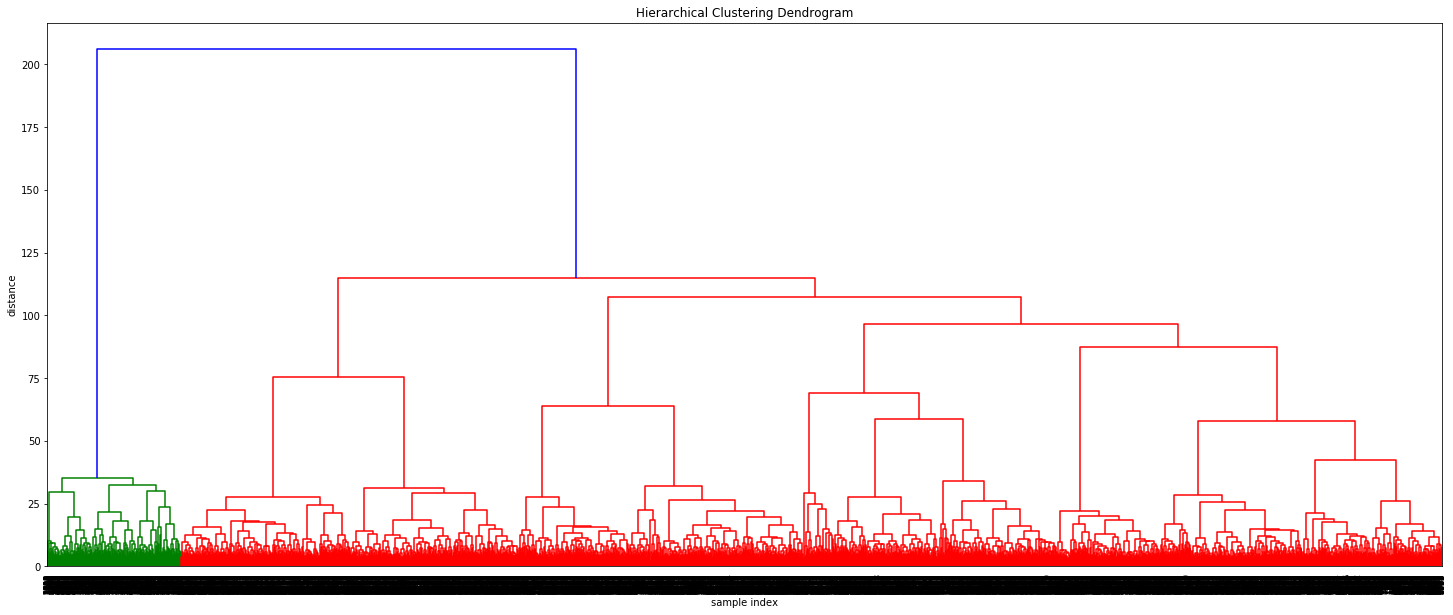

In [20]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

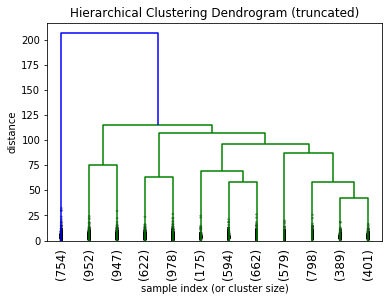

In [22]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index (or cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    #show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Even though this already makes for quite a nice visualization, we can pimp it even more by also annotating the distances inside the dendrogram by using some of the useful return values dendrogram():

In [23]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

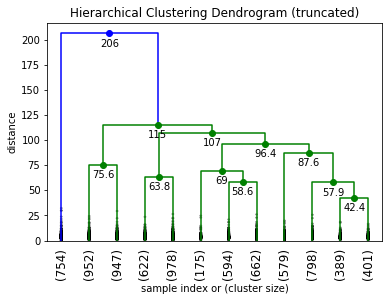

In [24]:

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

# Selecting a Distance Cut-Off aka Determining the Number of Clusters

In [27]:
# set cut-off to 100
max_d = 100  # max_d as in max_distance

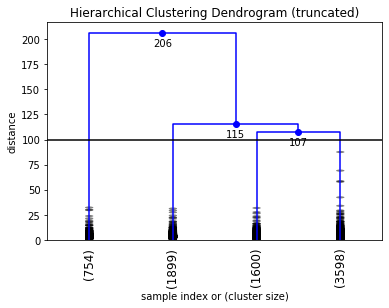

In [30]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=4,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [32]:
from scipy.cluster.hierarchy import fcluster
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([4, 4, 4, ..., 3, 4, 4], dtype=int32)

In [33]:
k=2
fcluster(Z, k, criterion='maxclust')

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [34]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 8, depth=10)

array([20, 24, 24, ..., 10, 13, 13], dtype=int32)

In [39]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 720x576 with 0 Axes>

# HAC with cosine linkages

https://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/

In [43]:
from sklearn.cluster import AgglomerativeClustering
Hclustering = AgglomerativeClustering(n_clusters=2,
 affinity=cosine, linkage=complete)
Hclustering.fit(X)

NameError: name 'cosine' is not defined

In [ ]:
H_mapping = {case:cluster for case,
 cluster in enumerate(Hclustering.labels_)}
final_mapping = {case:H_mapping[Kx_mapping[case]]
 for case in Kx_mapping}